# Comparison original sample to double peaks removed

In [1]:
import glob

from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt
import numpy as np

In [16]:
gal_name = '8144-6104'
gal_name = '8241-9101'
#gal_name = '8600-12702'
#gal_name = '8996-12701'
#gal_name = '9042-9101'

spectra_csv_original = Table.read('./original/'+'Spectra_stacks_'+gal_name+'.csv')
spectra_fits_original = fits.open('./original/'+'Spectra_stacks_'+gal_name+'.fits')
fastspec_table_original = Table.read('./original/'+'stackfit_Spectra_stacks_'+gal_name+'.fits')

spectra_csv_dp = Table.read('./Double_peak_correction/'+'Spectra_stacks_Nov_'+gal_name+'.csv')
spectra_fits_dp = fits.open('./Double_peak_correction/'+'Spectra_stacks_Nov_'+gal_name+'.fits')
fastspec_table_dp = Table.read('./Double_peak_correction/'+'stackfit_Spectra_stacks_Nov_'+gal_name+'.fits')

## Plot original stacks

/tmp/ipykernel_12820/1865058175.py:4: RuntimeWarning: divide by zero encountered in power
  plt.fill_between(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i]-spectra_fits_original['IVAR'].data[i]**-0.5, spectra_fits_original['FLUX'].data[i]+spectra_fits_original['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_original['FLUX'].data)))


(0.0, 250.0)

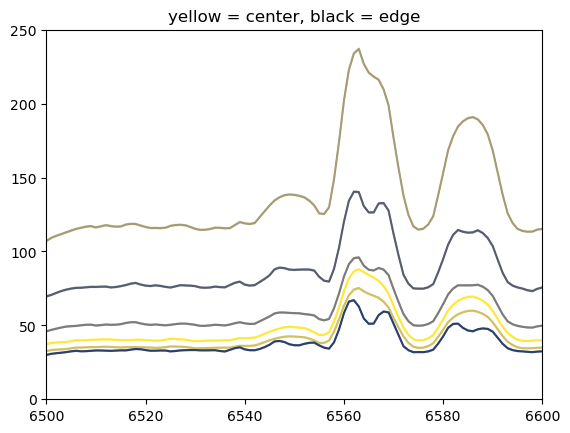

In [17]:
cmap = plt.get_cmap('cividis_r')
for i in range(len(spectra_fits_original['FLUX'].data)):
    plt.plot(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i], c=cmap(i/len(spectra_fits_original['FLUX'].data)))
    plt.fill_between(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i]-spectra_fits_original['IVAR'].data[i]**-0.5, spectra_fits_original['FLUX'].data[i]+spectra_fits_original['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_original['FLUX'].data)))
plt.title('yellow = center, black = edge')
plt.xlim(6500,6600)
plt.ylim(0,250)

## Plot new stacks

/tmp/ipykernel_12820/2673451109.py:9: RuntimeWarning: divide by zero encountered in power
  plt.fill_between(spectra_fits_dp['WAVE'].data, spectra_fits_dp['FLUX'].data[i]-spectra_fits_dp['IVAR'].data[i]**-0.5, spectra_fits_dp['FLUX'].data[i]+spectra_fits_dp['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_dp['FLUX'].data)))


(0.0, 250.0)

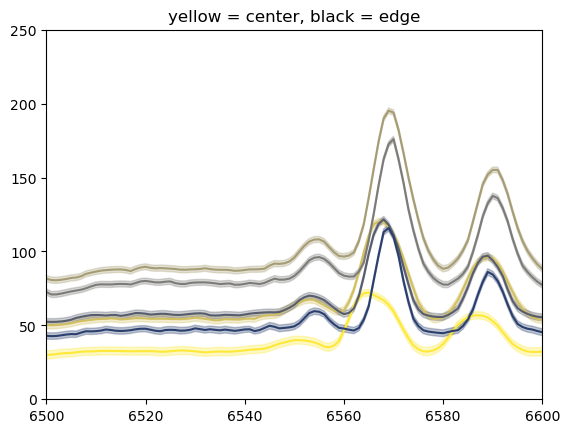

In [18]:
#cmap = plt.get_cmap('cividis_r')
#for i in range(len(spectra_fits_original['FLUX'].data)):
#    plt.plot(spectra_fits_original['WAVE'].data, spectra_fits_original['FLUX'].data[i], c=cmap(i/len(spectra_fits_original['FLUX'].data)))
#plt.title('yellow = center, black = edge')

cmap = plt.get_cmap('cividis_r')
for i in range(len(spectra_fits_dp['FLUX'].data)):
    plt.plot(spectra_fits_dp['WAVE'].data, spectra_fits_dp['FLUX'].data[i], c=cmap(i/len(spectra_fits_dp['FLUX'].data)))
    plt.fill_between(spectra_fits_dp['WAVE'].data, spectra_fits_dp['FLUX'].data[i]-spectra_fits_dp['IVAR'].data[i]**-0.5, spectra_fits_dp['FLUX'].data[i]+spectra_fits_dp['IVAR'].data[i]**-0.5, alpha=0.3, color=cmap(i/len(spectra_fits_dp['FLUX'].data)))

plt.title('yellow = center, black = edge')
plt.xlim(6500,6600)
plt.ylim(0,250)

## Compare H-alpha flux measurements

Text(0, 0.5, 'H$\\alpha$ flux new stack [10$^{-17}$ erg $\\AA^{-1}$ cm$^{-2}$ s$^{-1}$]')

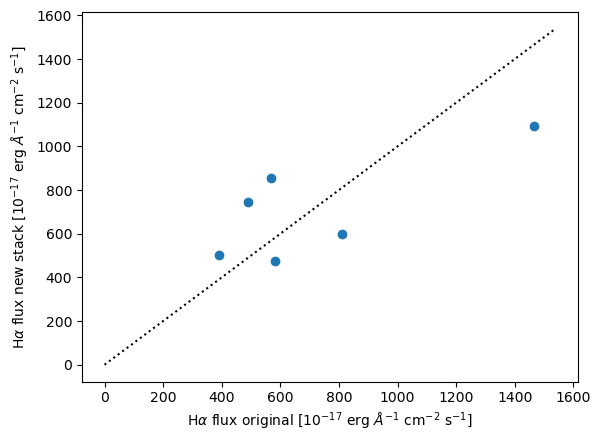

In [19]:
plt.errorbar(fastspec_table_original['HALPHA_FLUX'], fastspec_table_dp['HALPHA_FLUX'], xerr=fastspec_table_original['HALPHA_FLUX_IVAR']**-0.5, yerr=fastspec_table_dp['HALPHA_FLUX_IVAR']**-0.5, linestyle = ' ', marker='o')
line = np.linspace(0,1.05*np.max(fastspec_table_original['HALPHA_FLUX']),100)
plt.plot(line,line,linestyle=':', c='k')

plt.xlabel('H$\\alpha$ flux original [10$^{-17}$ erg $\\AA^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.ylabel('H$\\alpha$ flux new stack [10$^{-17}$ erg $\\AA^{-1}$ cm$^{-2}$ s$^{-1}$]')